# Expression of Crow data

This notebook tests the hypothesis that the uncorrelated genes from

This data was generated by running `download_Crow_data.R` script that downloads expression data from https://github.com/PavlidisLab/gemmaAPI.R

In [1]:
%load_ext autoreload
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ponyo import utils
from generic_expression_patterns_modules import ranking

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)
local_dir = params["local_dir"]
dataset_name = params["dataset_name"]
project_id = params["project_id"]
col_to_rank_genes = params["rank_genes_by"]
mapped_compendium_filename = params["mapped_compendium_filename"]

if_single_experiment = False

In [3]:
# Read in recount2 expression compendium
recount2_expression = pd.read_csv(
    mapped_compendium_filename, sep="\t", index_col=0, header=0
).T

## Format Crow expression data

* Include only genes that were used in our original analysis

In [4]:
# Read in Crow expression data
crow_expression_filename = os.path.join(local_dir, "Crow_expression_data_union.tsv")
crow_expression_data = pd.read_csv(
    crow_expression_filename, sep="\t", index_col=0, header=0
).T

In [5]:
crow_expression_data.shape

(14487, 32476)

In [6]:
crow_expression_data.head()

,L_IB38___BioAssayId=72907Name=050705MJA_U133_2.0_IB08.CEL,L_IB40___BioAssayId=72909Name=050705MJA_U133_2.0_IB10.CEL,L_IB41___BioAssayId=72910Name=050705MJA_U133_2.0_IB11.CEL,L_IB33___BioAssayId=72902Name=050705MJA_U133_2.0_IB03.CEL,L_IB36___BioAssayId=72905Name=050705MJA_U133_2.0_IB06.CEL,L_IB59___BioAssayId=72912Name=051223MJA_U133_2.0_IB59.CEL,L_IB60___BioAssayId=72913Name=051223MJA_U133_2.0_IB60.CEL,L_IB17___BioAssayId=72886Name=050511MJA_U133_2.0_IB17.CEL,L_IB20___BioAssayId=72889Name=050511MJA_U133_2.0_IB20.CEL,L_IB21___BioAssayId=72890Name=050511MJA_U133_2.0_IB21.CEL,...,GSE9988_Biomat_20___BioAssayId=88405Name=Anti.Trem1/LPS2hrsDonor10,GSE9988_Biomat_4___BioAssayId=88406Name=Anti.Trem1/LPS2hrsDonor3,GSE9988_Biomat_14___BioAssayId=88409Name=Anti.Trem1/LPS2hrsDonor5,GSE9988_Biomat_16___BioAssayId=88411Name=Anti.Trem1/LPS2hrsDonor9,GSE9988_Biomat_15___BioAssayId=88410Name=Anti.Trem1/LPS2hrsDonor7,GSE9988_Biomat_12___BioAssayId=88404Name=Anti.Trem1/LPS2hrsDonor2,GSE9988_Biomat_18___BioAssayId=88412Name=Anti.Trem1/LPS2hrsDonor4,GSE9988_Biomat_13___BioAssayId=88408Name=Anti.Trem1/LPS2hrsDonor11,GSE9988_Biomat_19___BioAssayId=88407Name=Anti.Trem1/LPS2hrsDonor6,GSE9988_Biomat_17___BioAssayId=88403Name=Anti.Trem1/LPS2hrsDonor1
HSPA6|HSPA7,8.96564,769.30450,23.69639,10.37628,48.51214,NaN,NaN,5.96790,8.36691,26.94385,...,7.119289,7.844919,7.152115,7.616878,6.273708,6.633022,7.270144,7.210642,6.469821,6.785819
UBA7,83.32761,61.90878,93.37774,56.58948,41.29277,27.79027,39.37290,30.72503,34.30363,21.10759,...,6.630704,6.887228,6.765646,6.751855,6.893142,6.932573,6.814365,6.721045,6.405350,6.925346
ESRRA,48.94783,119.33116,80.67838,64.83450,76.53021,NaN,NaN,90.35551,56.30252,23.17538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYP2A7|CYP2A6,6.05333,17.42643,27.73698,14.86978,15.66673,31.42781,24.67036,31.22093,35.16069,53.08181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM32,17.74886,11.58205,18.56551,8.71849,5.35315,NaN,NaN,8.44734,11.41885,14.21983,...,2.853339,2.842427,2.890531,3.022254,3.012579,2.995602,2.880937,3.013476,2.976160,2.717715


In [7]:
# Load gene_summary_filename
gene_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}.tsv"
)

summary_gene_ranks = pd.read_csv(gene_summary_filename, sep="\t", index_col=0, header=0)

In [8]:
summary_gene_ranks.head()

,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
PAX7,PAX7,5.950002e-13,17569.0,10.694069,10.694069,0.002644,15703.0,88.442041,0.545455,2.071917,1.709101,22,5.044847
PRAME,PRAME,2.959850e-15,17568.0,8.664896,8.664896,0.020151,13854.0,78.027487,0.545455,2.219810,2.247802,22,2.867283
SLCO1B3,SLCO1B3,5.291828e-04,17567.0,8.325529,8.325529,0.000205,16755.0,94.367466,0.727273,2.723600,1.671151,22,3.352139
KCNC2,KCNC2,1.983864e-10,17566.0,8.230783,8.230783,0.078105,15568.0,87.681649,0.409091,2.091518,1.844180,22,3.328995
HOTAIR,HOTAIR,3.115155e-10,17565.0,8.228355,8.228355,0.000887,17311.0,97.499155,0.600000,3.252611,2.453541,20,2.027985


In [9]:
# Subset genes
our_gene_ids = list(summary_gene_ranks.index)
crow_gene_ids = list(crow_expression_data.index)

shared_gene_ids = set(crow_gene_ids).intersection(our_gene_ids)

expression_data = crow_expression_data.loc[shared_gene_ids]

In [10]:
print(expression_data.shape)
expression_data.head()

(11176, 32476)


,L_IB38___BioAssayId=72907Name=050705MJA_U133_2.0_IB08.CEL,L_IB40___BioAssayId=72909Name=050705MJA_U133_2.0_IB10.CEL,L_IB41___BioAssayId=72910Name=050705MJA_U133_2.0_IB11.CEL,L_IB33___BioAssayId=72902Name=050705MJA_U133_2.0_IB03.CEL,L_IB36___BioAssayId=72905Name=050705MJA_U133_2.0_IB06.CEL,L_IB59___BioAssayId=72912Name=051223MJA_U133_2.0_IB59.CEL,L_IB60___BioAssayId=72913Name=051223MJA_U133_2.0_IB60.CEL,L_IB17___BioAssayId=72886Name=050511MJA_U133_2.0_IB17.CEL,L_IB20___BioAssayId=72889Name=050511MJA_U133_2.0_IB20.CEL,L_IB21___BioAssayId=72890Name=050511MJA_U133_2.0_IB21.CEL,...,GSE9988_Biomat_20___BioAssayId=88405Name=Anti.Trem1/LPS2hrsDonor10,GSE9988_Biomat_4___BioAssayId=88406Name=Anti.Trem1/LPS2hrsDonor3,GSE9988_Biomat_14___BioAssayId=88409Name=Anti.Trem1/LPS2hrsDonor5,GSE9988_Biomat_16___BioAssayId=88411Name=Anti.Trem1/LPS2hrsDonor9,GSE9988_Biomat_15___BioAssayId=88410Name=Anti.Trem1/LPS2hrsDonor7,GSE9988_Biomat_12___BioAssayId=88404Name=Anti.Trem1/LPS2hrsDonor2,GSE9988_Biomat_18___BioAssayId=88412Name=Anti.Trem1/LPS2hrsDonor4,GSE9988_Biomat_13___BioAssayId=88408Name=Anti.Trem1/LPS2hrsDonor11,GSE9988_Biomat_19___BioAssayId=88407Name=Anti.Trem1/LPS2hrsDonor6,GSE9988_Biomat_17___BioAssayId=88403Name=Anti.Trem1/LPS2hrsDonor1
FEM1C,100.19858,147.54712,155.40659,198.65103,128.83878,98.30912,126.93243,93.72352,293.61411,169.58116,...,8.526470,8.425815,7.958159,8.065980,8.800795,8.734830,8.673905,8.360612,8.390259,8.542698
AQP10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.191867,4.327315,3.983385,4.404443,4.375146,5.543746,4.389613,4.525042,4.797407,4.123028
ZNF383,30.43050,20.61020,33.52739,38.49280,13.86793,NaN,16.72065,15.30302,17.88895,14.32826,...,4.092606,3.918681,3.878531,3.822387,4.348416,3.588585,3.300024,4.051127,3.840785,3.772057
TFAP2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.173749,4.348112,4.042074,4.350218,4.081296,4.122057,4.142107,4.131748,4.315301,4.361689
ABCA8,581.63007,419.73828,1383.19336,1391.58350,257.41797,214.39861,78.01833,260.95856,553.69904,469.94849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## (optional) Select gene subset of samples

Select samples from a specific experiment to examine local gene expression behavior within a single experiment (local) in addition to across all samples (global)

We would actually like to do this for crow data but, we do not have metadata mapping experiment ids to sample ids. So this analysis option is only available for recount2 for now

In [11]:
recount2_metadata_filename = os.path.join(
    base_dir, dataset_name, "data", "metadata", "recount2_metadata.tsv"
)

In [12]:
# Function scraped from ponyo since we're already using a different version of ponyo in this repo
def get_sample_ids_random_experiment(
    metadata_filename, delimiter, experiment_colname, sample_id_colname
):
    """
    Returns sample ids (found in gene expression df) associated with
    a given list of experiment ids (found in the metadata)

    Arguments
    ----------
    metadata_filename: str
        Metadata file path. An example metadata file can be found
        here: https://github.com/greenelab/ponyo/blob/master/human_tests/data/metadata/recount2_metadata.tsv

    delimiter: str
        Delimiter for metadata file

    experiment_colname: str
        Column header that contains the experiment ids

    sample_id_colname: str
        Column header that contains sample id that maps expression data
        and metadata

    """

    # Read in metadata
    metadata = pd.read_csv(metadata_filename, header=0, sep=delimiter, index_col=None)

    # Set index column to experiment id column
    metadata.set_index(experiment_colname, inplace=True)

    # Select random experiment
    rn_experiment_id = random.choice(list(np.unique(metadata.index)))

    # Select samples associated with experiment id
    selected_metadata = metadata.loc[rn_experiment_id]
    sample_ids = list(selected_metadata[sample_id_colname])

    return sample_ids

In [13]:
if if_single_experiment:
    # Get sample ids for random experiment
    recount2_sample_ids = get_sample_ids_random_experiment(
        recount2_metadata_filename, "\t", "project", "run"
    )

    # Subset expression data
    recount2_expression = recount2_expression.loc[recount2_sample_ids]

## Get uncorrelated genes

r = 0.1851597404594152
p = 3.711325673092676e-132
ci_low = 0.17029928567585412
ci_high = 0.2003824832806408


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


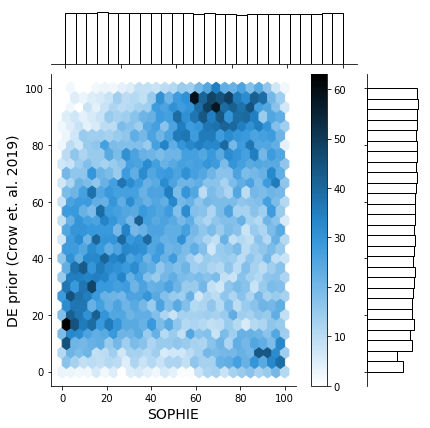

In [14]:
# Get generic genes identified by Crow et. al.
DE_prior_filename = params["reference_gene_filename"]
ref_gene_col = params["reference_gene_name_col"]
ref_rank_col = params["reference_rank_col"]

figure_filename = f"gene_ranking_{col_to_rank_genes}_tmp.svg"

corr, shared_ranking = ranking.compare_gene_ranking(
    summary_gene_ranks,
    DE_prior_filename,
    ref_gene_col,
    ref_rank_col,
    figure_filename,
)

In [15]:
shared_ranking.head()

,Percentile (simulated),DE_Prior_Rank,Gene_Name
Gene_Order,,,
9180,3.875183,52.115395,HDDC2
14823,24.107243,22.674631,KLHL12
10582,60.544103,44.806719,VPS54
14877,32.161766,22.395534,FEM1C
11046,75.616762,42.378319,AQP10


In [16]:
# Get uncorrelated gene ids
uncorrelated_ranking = shared_ranking[
    (shared_ranking["Percentile (simulated)"] > 80)
    & (shared_ranking["DE_Prior_Rank"] < 20)
]

uncorrelated_genes = uncorrelated_ranking["Gene_Name"]
print(len(uncorrelated_genes))

791


In [17]:
# Get correlated gene ids
correlated_ranking = shared_ranking[
    (shared_ranking["Percentile (simulated)"] > 80)
    & (shared_ranking["DE_Prior_Rank"] > 80)
]

correlated_genes = correlated_ranking["Gene_Name"]
print(len(correlated_genes))

900


In [18]:
# Save uncorrelated genes
uncorrelated_genes.to_csv("uncorrelated_genes.tsv", sep="\t")

## Plot average expression

In [19]:
# Get average expression of SOPHIE trained recount2 dataset
recount2_expression_mean = recount2_expression.mean(axis=1)

In [20]:
recount2_expression_mean.head()

A1BG         396.234336
A1BG-AS1     209.777608
A1CF         193.675354
A2M         5685.892147
A2M-AS1      177.060462
dtype: float64

In [21]:
# Get average expression of Crow dataset
crow_expression_mean = crow_expression_data.mean(axis=1)

In [22]:
crow_expression_mean.head()

HSPA6|HSPA7      18.885951
UBA7             29.220246
ESRRA            49.057550
CYP2A7|CYP2A6    17.760294
ADAM32            7.191467
dtype: float64

In [23]:
# Check that we selecting the correct genes
uncorrelated_genes = list(uncorrelated_genes.values)
uncorrelated_genes[0:5]

['TFAP2D', 'HOXC11', 'LINC01741', 'MAGEC3', 'RPL10L']

In [24]:
recount2_expression_mean[uncorrelated_genes].head()

TFAP2D        3.718817
HOXC11       69.641598
LINC01741     0.397434
MAGEC3        6.483374
RPL10L       82.454694
dtype: float64

In [25]:
crow_expression_mean.reindex(uncorrelated_genes).head()

TFAP2D        8.031341
HOXC11       17.697304
LINC01741    13.875571
MAGEC3        5.982010
RPL10L       13.306940
dtype: float64

Number of uncorrelated gene data available: 791


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit

Text(0.5, 0, 'log10(average expression)')

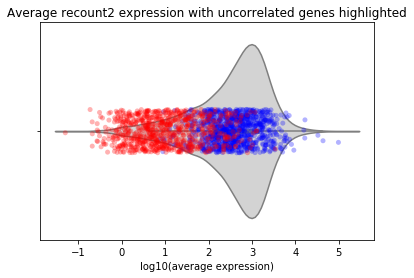

In [33]:
# Violin plot of average recount2 expression highlighing uncorrelated genes
print(
    f"Number of uncorrelated gene data available: {len(recount2_expression_mean[uncorrelated_genes])}"
)
f = sns.violinplot(np.log10(recount2_expression_mean), color="lightgrey")
f = sns.stripplot(
    np.log10(recount2_expression_mean[correlated_genes]), color="blue", alpha=0.3
)
f = sns.stripplot(
    np.log10(recount2_expression_mean[uncorrelated_genes]), color="red", alpha=0.3
)
f.set_title("Average recount2 expression with uncorrelated genes highlighted")
f.set_xlabel("log10(average expression)")

Number of uncorrelated gene data available: 791


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit

Text(0.5, 0, 'log10(average expression)')

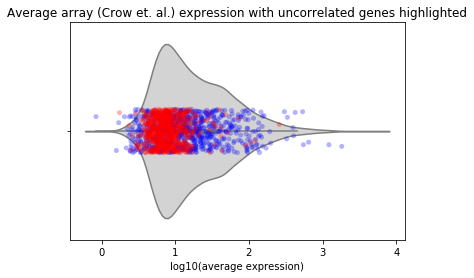

In [32]:
# Violin plot of average array expression highlighing uncorrelated genes
print(
    f"Number of uncorrelated gene data available: {len(crow_expression_mean.reindex(uncorrelated_genes))}"
)
g = sns.violinplot(np.log10(crow_expression_mean), color="lightgrey")
g = sns.stripplot(
    np.log10(crow_expression_mean[correlated_genes]), color="blue", alpha=0.3
)
g = sns.stripplot(
    np.log10(crow_expression_mean.reindex(uncorrelated_genes)), color="red", alpha=0.3
)
g.set_title(
    "Average array (Crow et. al.) expression with uncorrelated genes highlighted"
)
g.set_xlabel("log10(average expression)")

In [34]:
g.get_figure().savefig(
    "array_expression_dist_uncorr_genes_highlight.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

**Takeaway:**
* Our hypothesis is that these uncorrelated genes are those that are not well captured on microarray technology.
* Based on the distribution of the array data, it looks like these genes are fairly lowly expressed, but based on the density of the violin plot there appear to be many genes that have a similar range of expression. So these uncorrelated genes are as well captured as correlated genes.
* This hypothesis does not seem to hold

**Other thoughts:**

Looking to characterize _who_ these uncorrelated genes are, we used https://academic.oup.com/nar/article/48/D1/D174/5588346 to lookup the uncorrelated genes to determine if they have 3' end processing (i.e. polyadenylation sites)

Manually looking up individual genessd (since there doesn't seem to be a way to do this in batch), we found that most genes have at least one polyadenylated site.